In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import pmdarima as pm 
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from pmdarima.arima.utils import ndiffs, nsdiffs
from matplotlib import pyplot as plt
# metrics  
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Arima model for hoboken 

In [2]:
link = "./dataset/hoboken.csv"
hoboken = pd.read_csv(link)
hoboscaler = MinMaxScaler()
hoboken[['Value']] = hoboscaler.fit_transform(hoboken[['Value']])
hoboken.head()

,Date,Value
0,2015-01-31,0.000000
1,2015-02-28,0.027298
2,2015-03-31,0.039681
3,2015-04-30,0.049087
4,2015-05-31,0.066606


In [52]:
hoboken.Date = pd.to_datetime(hoboken.Date)

/Users/manedge/miniconda/envs/EnvironmentTest/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


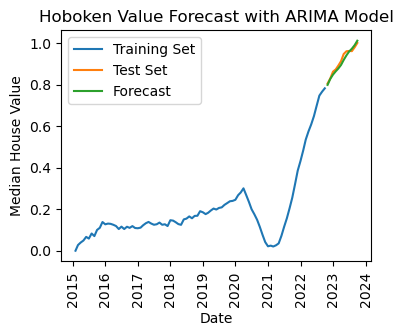

In [71]:
# Split data into training and testing sets
train_size = 93
train, test = hoboken.iloc[:train_size], hoboken.iloc[train_size:]

# Fit ARIMA model on training data
model = ARIMA(train['Value'], order=(4,2,4))
results = model.fit()

# Make predictions on the testing set
forecast_periods = len(test)
forecast = results.forecast(steps=forecast_periods)

# Plot actual vs. predicted Values
plt.figure(figsize=(4,3))
plt.plot(hoboken.Date[:train_size], train['Value'], label='Training Set')
plt.plot(hoboken.Date[train_size:], test['Value'], label='Test Set')
plt.plot(hoboken.Date[train_size:], forecast, label='Forecast')
plt.title('Hoboken Value Forecast with ARIMA Model')
plt.xticks(rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Median House Value')
plt.legend()
plt.show()


In [9]:
print(f'MSE is {mean_squared_error(test["Value"], forecast)}')
print(f'R2 is {r2_score(test["Value"], forecast)}' )

MSE is 0.000202390683918401
R2 is 0.9440795561692421


# ARIMA model for new york

In [64]:
link = './dataset/new york.csv'
new_york = pd.read_csv(link)
nyscaler = MinMaxScaler()
new_york[['Value']] = nyscaler.fit_transform(new_york[['Value']])
new_york = new_york.drop('index', axis=1)
new_york.Date = pd.to_datetime(new_york.Date)
new_york

,Date,Value
0,2015-01-31,0.056079
1,2015-02-28,0.075107
2,2015-03-31,0.089488
3,2015-04-30,0.105672
4,2015-05-31,0.113027
...,...,...
100,2023-05-31,1.000000
101,2023-06-30,0.997609
102,2023-07-31,0.990277
103,2023-08-31,0.981763


/Users/manedge/miniconda/envs/EnvironmentTest/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/manedge/miniconda/envs/EnvironmentTest/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


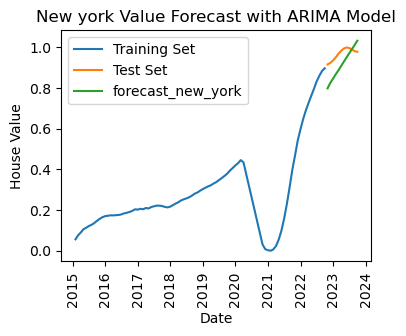

In [72]:
# Split data into training and testing sets
train_size_new_york = 93
train_new_york, test_new_york = new_york.iloc[:train_size_new_york], new_york.iloc[train_size_new_york:]

# Fit ARIMA model on training data
model = ARIMA(train['Value'], order=(4,2,2))
results = model.fit()

# Make predictions on the testing set
forecast_periods = len(test_new_york)
forecast_new_york = results.forecast(steps=forecast_periods)

# Plot actual vs. predicted Values
plt.figure(figsize=(4,3))
plt.plot(new_york.Date[:train_size_new_york], train_new_york['Value'], label='Training Set')
plt.plot(new_york.Date[train_size_new_york:], test_new_york['Value'], label='Test Set')
plt.plot(new_york.Date[train_size_new_york:], forecast_new_york, label='forecast_new_york')

plt.title('New york Value Forecast with ARIMA Model')
plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.ylabel('House Value')
plt.legend()
plt.show()

In [30]:
print(f'MSE is {mean_squared_error(test_new_york["Value"], forecast)}')
print(f'R2 is {r2_score(test_new_york["Value"], forecast)}' )

MSE is 0.005598456014509111
R2 is -6.06858753734776


# philly 

In [68]:
link = './dataset/philly.csv'
philly = pd.read_csv(link)
phillyscaler = MinMaxScaler()
philly.Date = pd.to_datetime(philly.Date)
phillyscaler.fit(philly[['Value']])
philly[['Value']] = phillyscaler.fit_transform(philly[['Value']])

/Users/manedge/miniconda/envs/EnvironmentTest/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


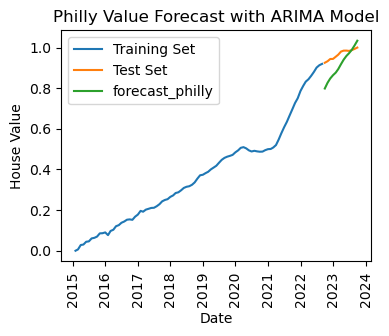

In [73]:
# Split data into training and testing sets
train_size_philly = 92
train_philly, test_philly = philly.iloc[:train_size_philly], philly.iloc[train_size_philly:]
best_pdq = (4,2,4)

# Fit ARIMA model on training data
model = ARIMA(train['Value'], order=best_pdq)
results = model.fit()

# Make predictions on the testing set
forecast_periods = len(test_philly)
forecast_philly = results.forecast(steps=forecast_periods)

# Plot actual vs. predicted Values
plt.figure(figsize=(4,3))
plt.plot(philly.Date[:train_size_philly], train_philly['Value'], label='Training Set')
plt.plot(philly.Date[train_size_philly:], test_philly['Value'], label='Test Set')
plt.plot(philly.Date[train_size_philly:], forecast_philly, label='forecast_philly')

plt.title('Philly Value Forecast with ARIMA Model')
plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.ylabel('House Value')
plt.legend()
plt.show()


In [74]:
print(f'MSE is {mean_squared_error(test_philly["Value"], forecast_philly)}')
print(f'R2 is {r2_score(test_philly["Value"], forecast_philly)}' )

MSE is 0.004781962876861228
R2 is -7.360642086836954
